In [1]:
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv

import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [5]:
start = pd.Timestamp('2019-05-01', tz='America/New_York').isoformat()
end = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

In [6]:
tickers=["SPY"]

In [7]:
timeframe="1Day"

In [8]:
portfolio_df_year = alpaca.get_bars(tickers, timeframe, start=start, end=end).df
portfolio_df_year = pd.concat([portfolio_df_year], keys=["SPY"], axis=1)
portfolio_df_year.head(10)

SPY                                         \
                             open    high       low     close     volume   
timestamp                                                                  
2019-05-01 04:00:00+00:00  294.72  294.95  291.8000  291.8200   71921870   
2019-05-02 04:00:00+00:00  291.68  292.70  289.5200  291.1300   65058183   
2019-05-03 04:00:00+00:00  292.82  294.34  291.2998  293.9800   56579556   
2019-05-06 04:00:00+00:00  289.25  293.31  288.9000  292.8300  107250892   
2019-05-07 04:00:00+00:00  290.15  290.81  285.8100  288.0500  145292657   
2019-05-08 04:00:00+00:00  287.53  289.43  286.8700  287.7300   91714817   
2019-05-09 04:00:00+00:00  285.23  287.33  283.3000  286.6700  103471271   
2019-05-10 04:00:00+00:00  285.62  288.94  282.3000  288.0300  112603342   
2019-05-13 04:00:00+00:00  282.42  283.49  279.9300  280.9905  127837979   
2019-05-14 04:00:00+00:00  281.99  285.10  281.8500  283.3800   77106090   

                                                          
                          trade_count        vwap symbol  
timestamp                                                 
2019-05-01 04:00:00+00:00      337374  293.457138    SPY  
2019-05-02 04:00:00+00:00      342564  291.101680    SPY  
2019-05-03 04:00:00+00:00      249557  293.438891    SPY  
2019-05-06 04:00:00+00:00      390959  291.952803    SPY  
2019-05-07 04:00:00+00:00      618594  288.280747    SPY  
2019-05-08 04:00:00+00:00      455857  288.141309    SPY  
2019-05-09 04:00:00+00:00      526341  285.580572    SPY  
2019-05-10 04:00:00+00:00      602402  285.828611    SPY  
2019-05-13 04:00:00+00:00      670187  281.560182    SPY  
2019-05-14 04:00:00+00:00      390251  283.609239    SPY

In [9]:
SPY_closing = pd.DataFrame()
SPY_closing['close'] = portfolio_df_year['SPY']['close']
SPY_closing.index = pd.to_datetime(portfolio_df_year.index.date)
SPY_closing.head()

,close
2019-05-01,291.82
2019-05-02,291.13
2019-05-03,293.98
2019-05-06,292.83
2019-05-07,288.05


In [10]:
SPY_daily_return = SPY_closing.pct_change().dropna()
SPY_daily_return.head()

,close
2019-05-02,-0.002364
2019-05-03,0.009789
2019-05-06,-0.003912
2019-05-07,-0.016323
2019-05-08,-0.001111


<AxesSubplot:title={'center':'SPY daily Return'}>

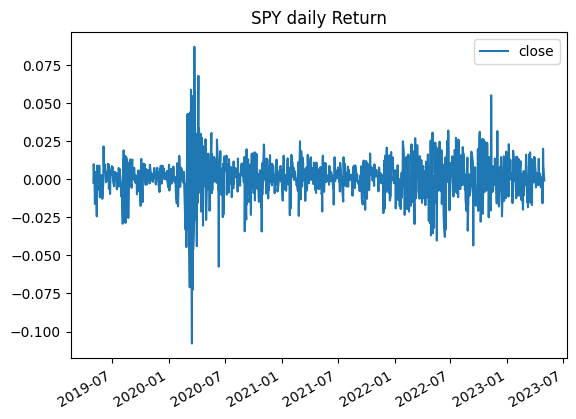

In [11]:
SPY_daily_return.plot(title='SPY daily Return')

In [12]:
MC_30years = MCSimulation(
    portfolio_data=portfolio_df_year,
    weights=[1],
    num_simulation=500,
    num_trading_days=30*252
)

In [ ]:
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tjyang/git/SP-Arbitrage/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

In [ ]:
fig = MC_30years.plot_simulation().figure
fig.savefig('mc_30yrs_simulation.png', bbox_inches='tight')

In [ ]:
fig = MC_30years.plot_distribution().figure
fig.savefig('mc_30yrs_distribution.png', bbox_inches='tight')

In [ ]:
tbl = MC_30years.summarize_cumulative_return()
print(tbl)

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = initial_investment * tbl[8]
ci_upper = initial_investment * tbl[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:.0f} and ${ci_upper:.0f}")

In [ ]:
# Calculate the daily standard deviations of all portfolios
daily_std = SPY_daily_return.std()
daily_std

In [ ]:
# Calculate the sharpe ratio
sharpe_ratio = (SPY_daily_return.mean() * 252) / (SPY_daily_return.std() * np.sqrt(252))
print(f'Sharpe ratio for SPY is:{sharpe_ratio}')